# K mean Clustering

In [3]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\roari\Downloads\customer_kmean_data.csv"
data = pd.read_csv(file_path)
data

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


In [5]:
 data.shape

(1000, 8)

In [7]:
data.size

8000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [11]:
data.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [13]:
data.dtypes

name                   object
age                     int64
gender                 object
education              object
income                  int64
country                object
purchase_frequency    float64
spending              float64
dtype: object

In [15]:
data.isnull().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

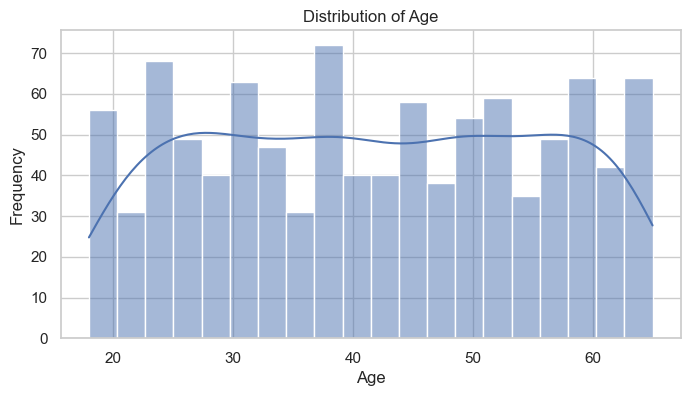

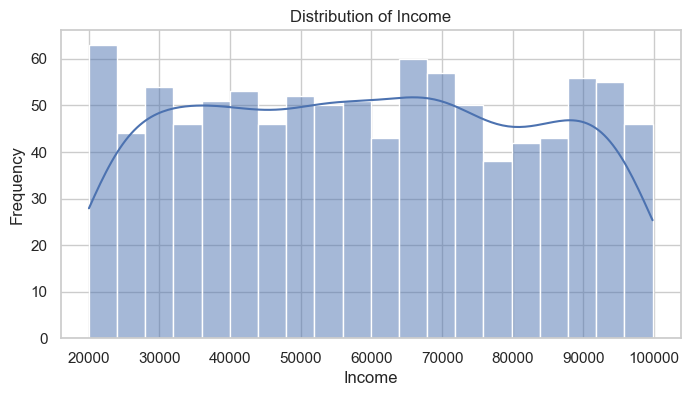

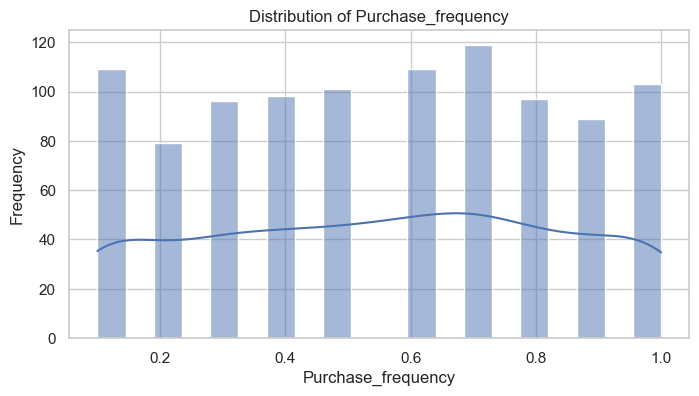

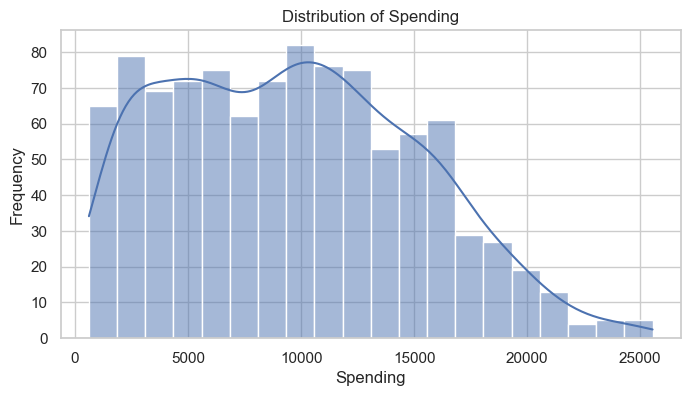

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of numeric columns
numeric_columns = ['age', 'income', 'purchase_frequency', 'spending']

# Create histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.show()


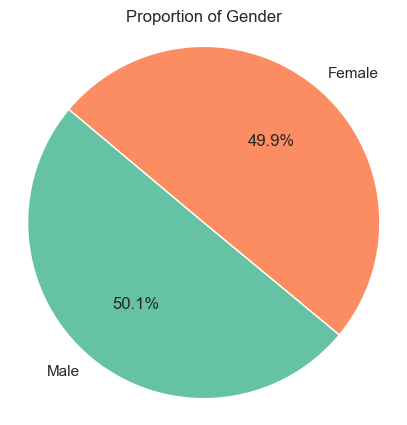

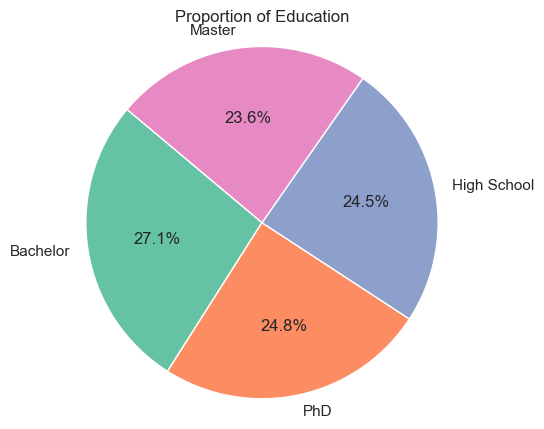

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot pie charts for categorical columns
def plot_pie_chart(column):
    # Calculate value counts (counts of each category)
    category_counts = data[column].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(f'Proportion of {column.capitalize()}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# List of categorical columns for pie chart
categorical_columns = ['gender', 'education']

# Create pie charts for each categorical column
for column in categorical_columns:
    plot_pie_chart(column)


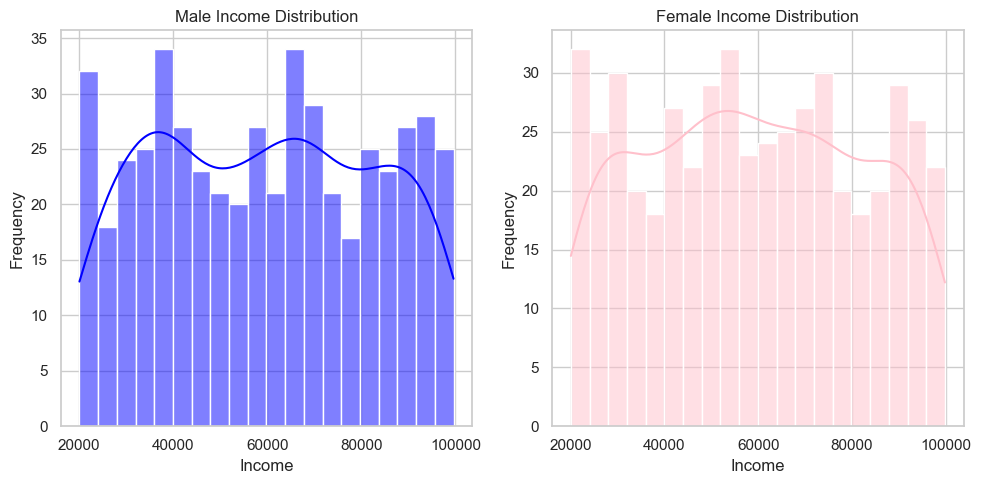

Male Income - Mean: 59519.32734530938, Median: 59600.0, Mode: 82563
Female Income - Mean: 59035.40881763527, Median: 58272.0, Mode: 20067


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Separate data based on gender
male_income = data[data['gender'] == 'Male']['income']
female_income = data[data['gender'] == 'Female']['income']

# Plot histograms for Male and Female income
plt.figure(figsize=(10, 5))

# Male Income Histogram
plt.subplot(1, 2, 1)
sns.histplot(male_income, kde=True, bins=20, color='blue')
plt.title('Male Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Female Income Histogram
plt.subplot(1, 2, 2)
sns.histplot(female_income, kde=True, bins=20, color='pink')
plt.title('Female Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate Mean, Median, and Mode for both genders
male_mean = male_income.mean()
female_mean = female_income.mean()

male_median = male_income.median()
female_median = female_income.median()

male_mode = male_income.mode()[0]
female_mode = female_income.mode()[0]

print(f"Male Income - Mean: {male_mean}, Median: {male_median}, Mode: {male_mode}")
print(f"Female Income - Mean: {female_mean}, Median: {female_median}, Mode: {female_mode}")


C:\Users\roari\AppData\Local\Temp\ipykernel_13192\2872828565.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_income = data.groupby(['age_bin', 'gender'])['income'].median().unstack()


<Figure size 1200x600 with 0 Axes>

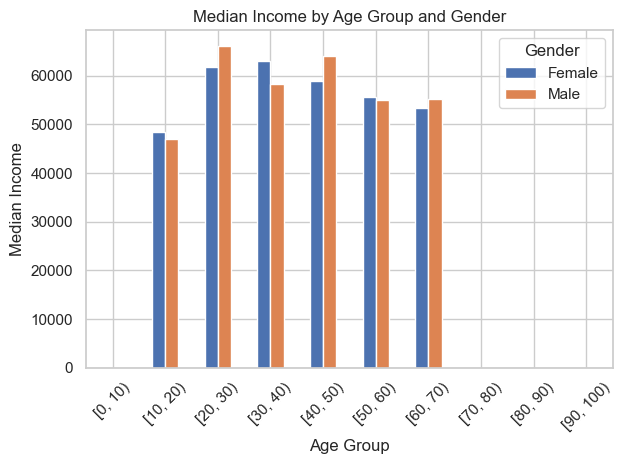

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create age bins of 10 years
data['age_bin'] = pd.cut(data['age'], bins=range(0, 101, 10), right=False)

# Calculate the median income for each age bin by gender
median_income = data.groupby(['age_bin', 'gender'])['income'].median().unstack()

# Plot the joint histogram
plt.figure(figsize=(12, 6))
median_income.plot(kind='bar', stacked=False)
plt.title('Median Income by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Median Income')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numeric_columns = ['age', 'income', 'purchase_frequency', 'spending']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply Min-Max scaling
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the first few rows of the scaled data
data.head()

,name,age,gender,education,income,country,purchase_frequency,spending,age_bin
0,Teresa Williams MD,0.510638,Female,High School,0.425146,Slovenia,0.888889,0.505931,"[40, 50)"
1,Christine Myers,0.659574,Female,Master,0.782919,Aruba,0.555556,0.483749,"[40, 50)"
2,Dwayne Moreno,0.787234,Male,Bachelor,0.462827,Cyprus,0.222222,0.190183,"[50, 60)"
3,Amy Norton,0.127660,Female,Bachelor,0.509348,Palau,0.111111,0.079991,"[20, 30)"
4,Tonya Adams,0.978723,Male,Master,0.775596,Zambia,0.888889,0.736842,"[60, 70)"


In [41]:
# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(data, columns=['gender', 'education', 'country'], drop_first=True)

# Display the first few rows of the encoded DataFrame
print(data_encoded.head())

# Check the shape of the new DataFrame
print(f"Original shape: {data.shape}, Encoded shape: {data_encoded.shape}")


                 name       age    income  purchase_frequency  spending  \
0  Teresa Williams MD  0.510638  0.425146            0.888889  0.505931   
1     Christine Myers  0.659574  0.782919            0.555556  0.483749   
2       Dwayne Moreno  0.787234  0.462827            0.222222  0.190183   
3          Amy Norton  0.127660  0.509348            0.111111  0.079991   
4         Tonya Adams  0.978723  0.775596            0.888889  0.736842   

    age_bin  gender_Male  education_High School  education_Master  \
0  [40, 50)        False                   True             False   
1  [40, 50)        False                  False              True   
2  [50, 60)         True                  False             False   
3  [20, 30)        False                  False             False   
4  [60, 70)         True                  False              True   

   education_PhD  ...  country_Uruguay  country_Uzbekistan  country_Vanuatu  \
0          False  ...            False               Fa

In [45]:
data_encoded

,name,age,income,purchase_frequency,spending,age_bin,gender_Male,education_High School,education_Master,education_PhD,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,Teresa Williams MD,0.510638,0.425146,0.888889,0.505931,"[40, 50)",False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Christine Myers,0.659574,0.782919,0.555556,0.483749,"[40, 50)",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Dwayne Moreno,0.787234,0.462827,0.222222,0.190183,"[50, 60)",True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Amy Norton,0.127660,0.509348,0.111111,0.079991,"[20, 30)",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Tonya Adams,0.978723,0.775596,0.888889,0.736842,"[60, 70)",True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Jason Haas,0.510638,0.979812,0.666667,0.674726,"[40, 50)",False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
996,Sharon Valdez,0.446809,0.490827,0.888889,0.443195,"[30, 40)",True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
997,Andrew Taylor,0.680851,0.498777,0.333333,0.264059,"[50, 60)",True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
998,Jessica Johnson,0.680851,0.479517,0.666667,0.534501,"[50, 60)",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# Convert only the boolean columns to integers (0 and 1)
bool_columns = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# If you want to convert the age_bin intervals to a string or handle them differently, you can do so as follows
# For instance, convert to string representation or drop the column based on your needs:
data_encoded['age_bin'] = data_encoded['age_bin'].astype(str)  # Convert intervals to strings

# Display the first few rows of the updated DataFrame to verify the conversion
print(data_encoded.head())

# Check the shape of the new DataFrame again
print(f"Encoded shape after conversion: {data_encoded.shape}")


                 name       age    income  purchase_frequency  spending  \
0  Teresa Williams MD  0.510638  0.425146            0.888889  0.505931   
1     Christine Myers  0.659574  0.782919            0.555556  0.483749   
2       Dwayne Moreno  0.787234  0.462827            0.222222  0.190183   
3          Amy Norton  0.127660  0.509348            0.111111  0.079991   
4         Tonya Adams  0.978723  0.775596            0.888889  0.736842   

    age_bin  gender_Male  education_High School  education_Master  \
0  [40, 50)            0                      1                 0   
1  [40, 50)            0                      0                 1   
2  [50, 60)            1                      0                 0   
3  [20, 30)            0                      0                 0   
4  [60, 70)            1                      0                 1   

   education_PhD  ...  country_Uruguay  country_Uzbekistan  country_Vanuatu  \
0              0  ...                0                 

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming data_encoded is your DataFrame
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Identify the columns to scale
# Exclude non-numeric columns like 'name' and 'age_bin'
columns_to_scale = data_encoded.select_dtypes(include=['float64', 'int']).columns

# Fit and transform the scaler on the selected columns
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

# Display the first few rows of the scaled DataFrame to verify the transformation
data_encoded.head()


,name,age,income,purchase_frequency,spending,age_bin,gender_Male,education_High School,education_Master,education_PhD,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,Teresa Williams MD,0.510638,0.425146,0.888889,0.505931,"[40, 50)",0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Christine Myers,0.659574,0.782919,0.555556,0.483749,"[40, 50)",0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dwayne Moreno,0.787234,0.462827,0.222222,0.190183,"[50, 60)",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Amy Norton,0.127660,0.509348,0.111111,0.079991,"[20, 30)",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tonya Adams,0.978723,0.775596,0.888889,0.736842,"[60, 70)",1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
# Drop the 'age_bin' column from the DataFrame
data_encoded = data_encoded.drop(columns=['age_bin'])

# Display the first few rows to verify the column has been dropped
data_encoded.head()

,name,age,income,purchase_frequency,spending,gender_Male,education_High School,education_Master,education_PhD,country_Albania,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,Teresa Williams MD,0.510638,0.425146,0.888889,0.505931,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Christine Myers,0.659574,0.782919,0.555556,0.483749,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dwayne Moreno,0.787234,0.462827,0.222222,0.190183,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Amy Norton,0.127660,0.509348,0.111111,0.079991,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tonya Adams,0.978723,0.775596,0.888889,0.736842,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


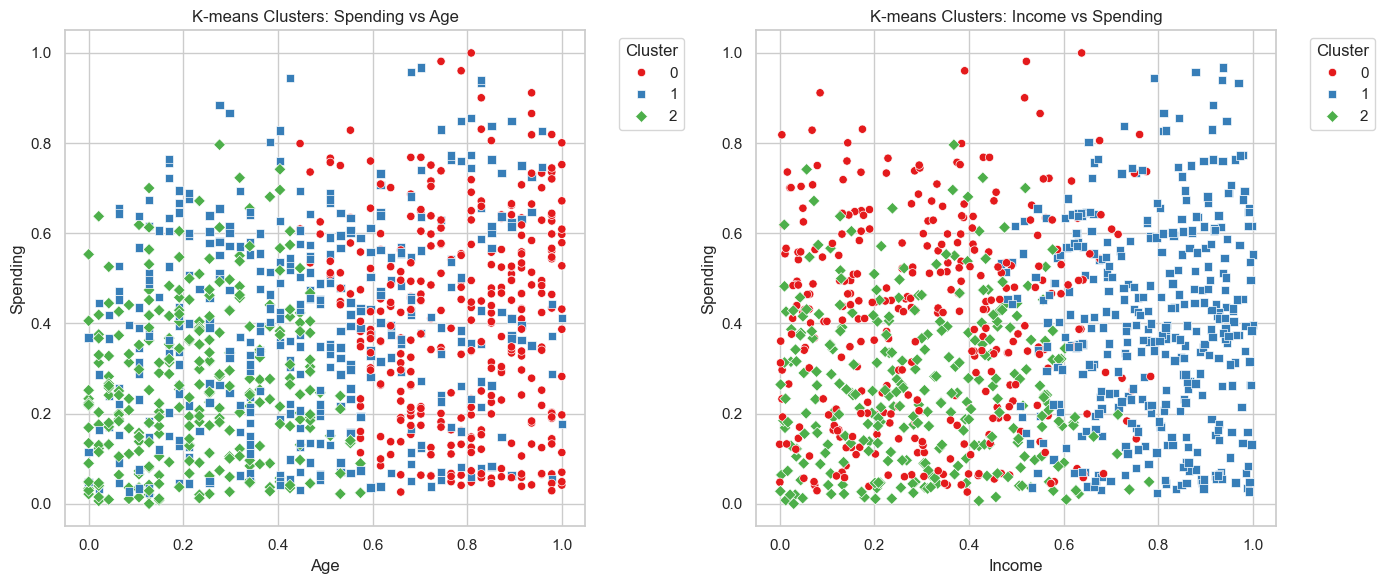

In [63]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 2: Prepare the data
# Select the features for clustering
X = data_encoded[['age', 'spending', 'income']]

# Step 3: Perform K-means Clustering
# Choose the number of clusters
k = 3  # You can adjust this number as needed
kmeans = KMeans(n_clusters=k, random_state=42)
data_encoded['cluster'] = kmeans.fit_predict(X)

# Step 4: Visualize the clusters
# Set up the plotting area
plt.figure(figsize=(14, 6))

# Plot 1: Spending vs Age
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_encoded, x='age', y='spending', hue='cluster', palette='Set1', style='cluster', markers=['o', 's', 'D'])
plt.title('K-means Clusters: Spending vs Age')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Income vs Spending
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_encoded, x='income', y='spending', hue='cluster', palette='Set1', style='cluster', markers=['o', 's', 'D'])
plt.title('K-means Clusters: Income vs Spending')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plots
plt.tight_layout()
plt.show()


C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

For n_clusters = 2, the silhouette score is: 0.2749
For n_clusters = 3, the silhouette score is: 0.2889
For n_clusters = 4, the silhouette score is: 0.2908
For n_clusters = 5, the silhouette score is: 0.2825
For n_clusters = 6, the silhouette score is: 0.2840
For n_clusters = 7, the silhouette score is: 0.2794
For n_clusters = 8, the silhouette score is: 0.2585
For n_clusters = 9, the silhouette score is: 0.2645
For n_clusters = 10, the silhouette score is: 0.2695


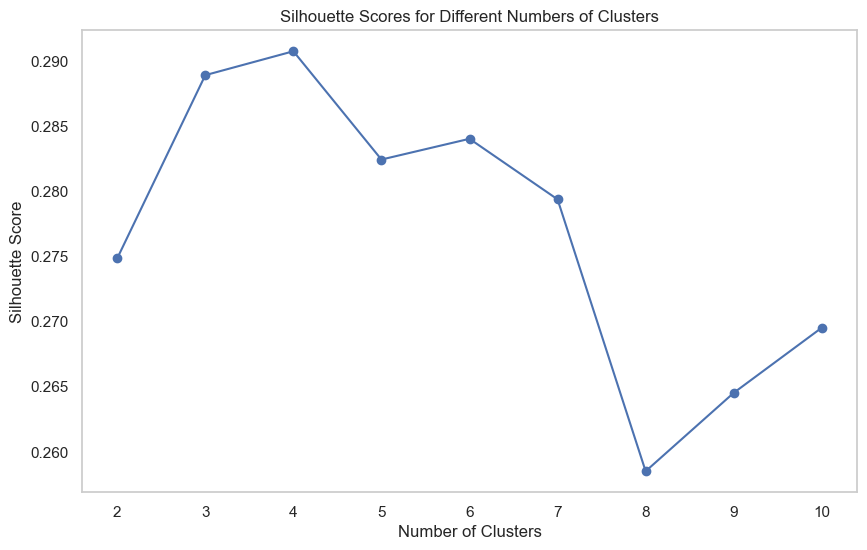

In [67]:
# Step 1: Import necessary libraries
from sklearn.metrics import silhouette_score

# Step 2: Prepare the data
# Select the features for clustering
X = data_encoded[['age', 'spending', 'income']]

# Step 3: Compute K-means for a range of clusters and calculate silhouette scores
silhouette_scores = []
range_n_clusters = range(2, 11)  # You can adjust the range as needed

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg:.4f}")

# Step 4: Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()


C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\roari\AppData\Local\Temp\ipykernel_13192\3475520162.py:24: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=data_encoded, x='age', y='spending', hue='cluster', palette='Set1', style='cluster', markers=['o', 's', 'D'])
C:\Users\roari\AppData\Local\Temp\ipykernel_13192\3475520162.py:32: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=data_encoded, x='income', y='spending', hue='cluster', palette='Set1', style='cluster', markers=['o', 's', 'D'])


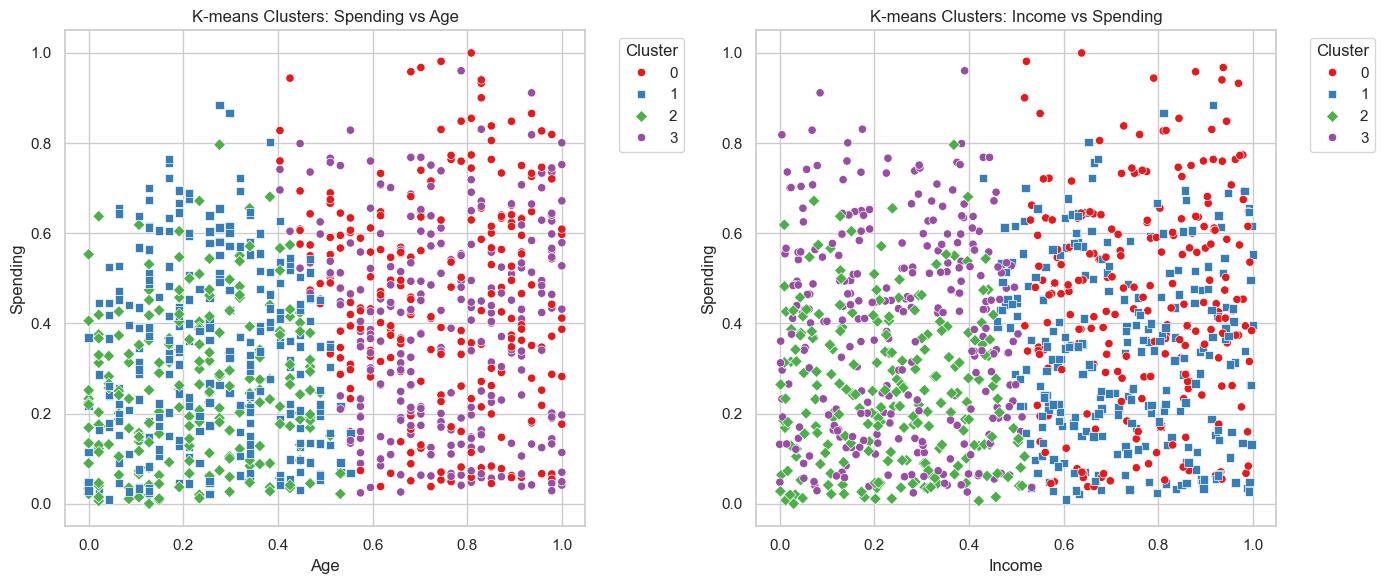

In [69]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 2: Prepare the data
# Select the features for clustering
X = data_encoded[['age', 'spending', 'income']]

# Step 3: Perform K-means Clustering
# Choose the number of clusters
k = 4  # You can adjust this number as needed
kmeans = KMeans(n_clusters=k, random_state=42)
data_encoded['cluster'] = kmeans.fit_predict(X)

# Step 4: Visualize the clusters
# Set up the plotting area
plt.figure(figsize=(14, 6))

# Plot 1: Spending vs Age
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_encoded, x='age', y='spending', hue='cluster', palette='Set1', style='cluster', markers=['o', 's', 'D'])
plt.title('K-means Clusters: Spending vs Age')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Income vs Spending
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_encoded, x='income', y='spending', hue='cluster', palette='Set1', style='cluster', markers=['o', 's', 'D'])
plt.title('K-means Clusters: Income vs Spending')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plots
plt.tight_layout()
plt.show()


C:\Users\roari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



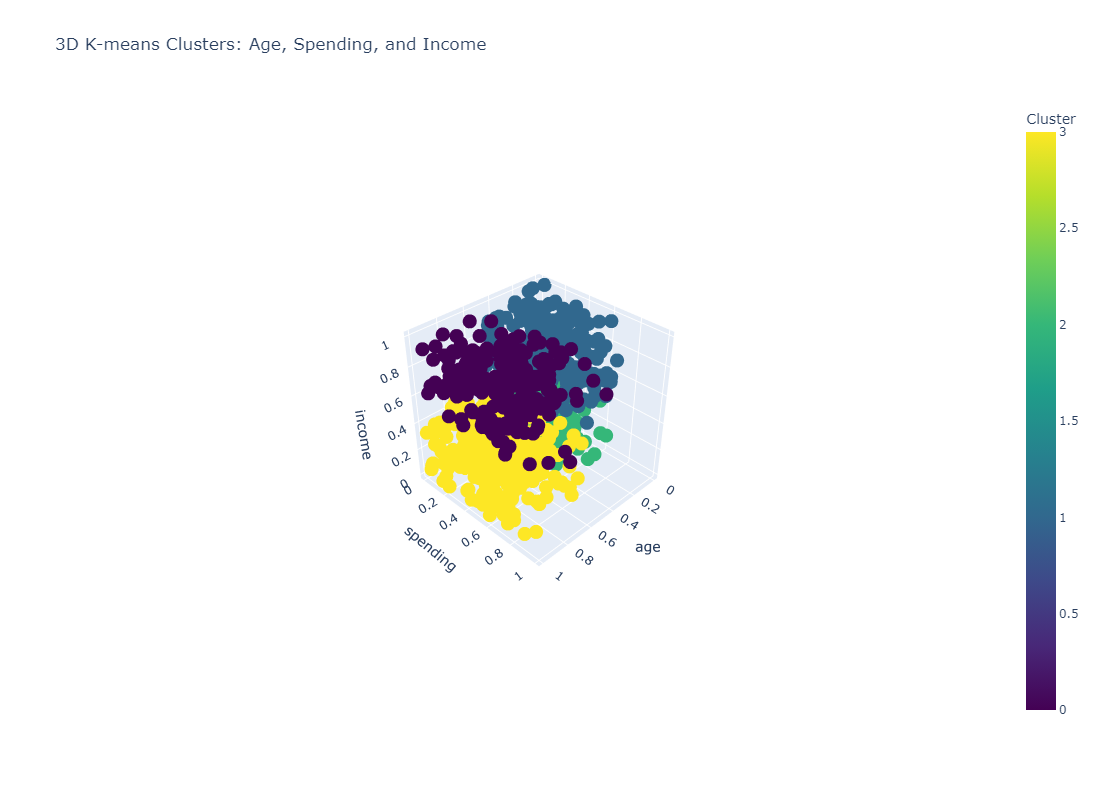

In [77]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Assuming data_encoded is your DataFrame
# Step 1: Prepare the data
# Select the features for clustering
X = data_encoded[['age', 'spending', 'income']]

# Step 2: Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Perform K-means Clustering
k = 4  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
data_encoded['cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Create 3D scatter plot using Plotly
fig = px.scatter_3d(
    data_encoded,
    x='age',
    y='spending',
    z='income',
    color='cluster',
    labels={'cluster': 'Cluster'},
    title='3D K-means Clusters: Age, Spending, and Income',
    color_continuous_scale=px.colors.sequential.Viridis,
)

# Update layout for larger size
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=800,  # Set the height of the plot
)

# Show the plot
fig.show()
